In [2]:
#chargement des données tabulaires
import pandas as pd
df_train = pd.read_csv('../data/csv_raw/train_labels.csv')
# cast des coordonnées en int depuis float
df_train['Motor_axis_0'] = df_train['Motor_axis_0'].astype(int)
df_train['Motor_axis_1'] = df_train['Motor_axis_1'].astype(int)
df_train['Motor_axis_2'] = df_train['Motor_axis_2'].astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          737 non-null    int64  
 1   row_id              737 non-null    int64  
 2   tomo_id             737 non-null    object 
 3   Motor_axis_0        737 non-null    int64  
 4   Motor_axis_1        737 non-null    int64  
 5   Motor_axis_2        737 non-null    int64  
 6   Array_shape_axis_0  737 non-null    int64  
 7   Array_shape_axis_1  737 non-null    int64  
 8   Array_shape_axis_2  737 non-null    int64  
 9   Voxel_spacing       737 non-null    float64
 10  Number_of_motors    737 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 63.5+ KB


In [3]:
# accès au chemin d'une slice en fonction de l'identifiant du tomogramme et de l'indice de la slice
import os

tomogrammes_train_dir = '../data/pictures_raw/train/'

def get_slice_file_path(tomogram_id, z):
    file_name = f'slice_{str(z).zfill(4)}.jpg'
    print(f'get_slice_file_path: {tomogram_id} {z} {file_name}')
    image_path = os.path.join(tomogrammes_train_dir, tomogram_id, file_name)
    return image_path
get_slice_file_path("tomo_4555b6",1)

get_slice_file_path: tomo_4555b6 1 slice_0001.jpg


'../data/pictures_raw/train/tomo_4555b6/slice_0001.jpg'

In [4]:
# récupération des coordonnées du moteur dans le tomogramme
def get_motor_coordinates(tomogram_id):
    df_tomogram = df_train[df_train['tomo_id'] == tomogram_id]
    x = df_tomogram['Motor_axis_2'].values[0]
    y = df_tomogram['Motor_axis_1'].values[0]
    z = df_tomogram['Motor_axis_0'].values[0]
    print(f'get_motor_coordinates: {tomogram_id} {x} {y} {z}')
    return x, y, z
get_motor_coordinates("tomo_4555b6")

get_motor_coordinates: tomo_4555b6 853 403 190


(np.int64(853), np.int64(403), np.int64(190))

In [5]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


def display_tomogramme(tomogram_id, z, y, x):
    # recherche du chemin de l'image
    image_path = get_slice_file_path(tomogram_id, z)

    # affichage de l'image
    img = mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')

    # tracé du point
    circle = plt.Circle((x, y), 25, color='r', fill=False, linewidth=1)
    plt.gca().add_patch(circle)
    plt.scatter([x], [y], c='r', s=1)
    plt.show()

    # enregistrement de l'image
    #plt.savefig(f'{tomogram_id}_{z}.jpg')


get_motor_coordinates: tomo_4555b6 853 403 190
get_slice_file_path: tomo_4555b6 190 slice_0190.jpg


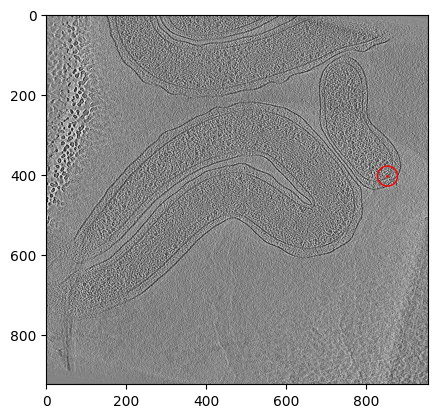

In [6]:
tomo_id = "tomo_4555b6"
x, y, z = get_motor_coordinates(tomo_id)
display_tomogramme(tomo_id,z,y,x)

In [7]:
# render d'un tomogramme avec un moteur dans le repertoire "output_path"
import os
from PIL import Image, ImageDraw

output_path = '../data/pictures_process/motor_position/'
if not os.path.exists(output_path):
    os.makedirs(output_path)

def render_tomogramme_to_file(tomogram_id, z, y, x):
    # recherche du chemin de l'image
    image_path = get_slice_file_path(tomogram_id, z)

    # Ouvre l'image
    img = Image.open(image_path).convert('RGB')

    # Prépare le dessin
    draw = ImageDraw.Draw(img)

    # Dessine un cercle (défini par son bounding box)
    rayon = 25
    left_up = (x - rayon, y - rayon)
    right_down = (x + rayon, y + rayon)
    draw.ellipse([left_up, right_down], outline='red', width=2)

    # dessin d'un point au centre du cercle
    draw.ellipse(
        [(x - 1, y - 1), (x + 1, y + 1)],
        fill='red', outline='red'
    )

    # Sauvegarde
    img.save(f'{output_path}/{tomogram_id}_{z}.jpg')

In [8]:
# liste des tomogrammes à 1 seul moteur
df_train_1 = df_train[df_train['Number_of_motors']==1]
id_1_moteurs = df_train_1['tomo_id'].unique()
print(id_1_moteurs)

['tomo_13973d' 'tomo_4555b6' 'tomo_656915' 'tomo_a67e9f' 'tomo_ed1c97'
 'tomo_05df8a' 'tomo_0a8f05' 'tomo_0da370' 'tomo_101279' 'tomo_13484c'
 'tomo_161683' 'tomo_1cc887' 'tomo_256717' 'tomo_30b580' 'tomo_319f79'
 'tomo_399bd9' 'tomo_4077d8' 'tomo_4102f1' 'tomo_412d88' 'tomo_444829'
 'tomo_46250a' 'tomo_49f4ee' 'tomo_510f4e' 'tomo_517f70' 'tomo_56b9a3'
 'tomo_57592d' 'tomo_5764d6' 'tomo_57c814' 'tomo_60d478' 'tomo_622ca9'
 'tomo_66285d' 'tomo_68e123' 'tomo_6bc974' 'tomo_71ece1' 'tomo_73173f'
 'tomo_79d622' 'tomo_89d156' 'tomo_8c13d9' 'tomo_a020d7' 'tomo_b0e5c6'
 'tomo_b50c0f' 'tomo_b80310' 'tomo_c678d9' 'tomo_c8f3ce' 'tomo_ca1d13'
 'tomo_cf53d0' 'tomo_d0aa3b' 'tomo_e26c6b' 'tomo_e2ccab' 'tomo_f8b46e'
 'tomo_fadbe2' 'tomo_fd9357' 'tomo_00e047' 'tomo_02862f' 'tomo_03437b'
 'tomo_05f919' 'tomo_081a2d' 'tomo_0c3a99' 'tomo_0eb994' 'tomo_0fab19'
 'tomo_122a02' 'tomo_134bb0' 'tomo_138018' 'tomo_139d9e' 'tomo_1efc28'
 'tomo_1f0e78' 'tomo_23ce49' 'tomo_2c8ea2' 'tomo_2e1f4c' 'tomo_30d4e5'
 'tomo

In [9]:
# render des tomogrammes avec un moteur
for tomogram_id in id_1_moteurs:
    print(f'{tomogram_id}')
    x, y, z = get_motor_coordinates(tomogram_id)
    render_tomogramme_to_file(tomogram_id,z,y,x)

tomo_13973d
get_motor_coordinates: tomo_13973d 808 221 234
get_slice_file_path: tomo_13973d 234 slice_0234.jpg
tomo_4555b6
get_motor_coordinates: tomo_4555b6 853 403 190
get_slice_file_path: tomo_4555b6 190 slice_0190.jpg
tomo_656915
get_motor_coordinates: tomo_656915 167 794 202
get_slice_file_path: tomo_656915 202 slice_0202.jpg
tomo_a67e9f
get_motor_coordinates: tomo_a67e9f 774 158 277
get_slice_file_path: tomo_a67e9f 277 slice_0277.jpg
tomo_ed1c97
get_motor_coordinates: tomo_ed1c97 186 64 241
get_slice_file_path: tomo_ed1c97 241 slice_0241.jpg
tomo_05df8a
get_motor_coordinates: tomo_05df8a 762 257 130
get_slice_file_path: tomo_05df8a 130 slice_0130.jpg
tomo_0a8f05
get_motor_coordinates: tomo_0a8f05 575 587 52
get_slice_file_path: tomo_0a8f05 52 slice_0052.jpg
tomo_0da370
get_motor_coordinates: tomo_0da370 636 356 28
get_slice_file_path: tomo_0da370 28 slice_0028.jpg
tomo_101279
get_motor_coordinates: tomo_101279 585 295 161
get_slice_file_path: tomo_101279 161 slice_0161.jpg
tomo_1